In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path

from src.paths import project_dir
from src.datasets.ellipse_dataset import EllipseDataset

logging.basicConfig(level=logging.INFO)

In [2]:
base_dir = Path('./../src/preprocessing/data/ellipsoids')
exact_sdf_dir = base_dir / 'exact_sdf'
approximate_sdf_dir = base_dir / 'approx_sdf'
tanh_sharper_dir = base_dir / 'tanh_sharp'
tanh_smooth_dir = base_dir / 'tanh_smooth'
tanh_dir = base_dir / 'tanh'

In [3]:
dataset_exact_sdf = EllipseDataset(exact_sdf_dir, split='val', debug=True)
dataset_approximate_sdf = EllipseDataset(approximate_sdf_dir, split='val', debug=True)
dataset_tanh = EllipseDataset(tanh_dir, split='val', debug=True)
dataset_tanh_sharp = EllipseDataset(tanh_sharper_dir, split='val', debug=True)
dataset_tanh_smooth = EllipseDataset(tanh_smooth_dir, split='val', debug=True)

INFO:src.datasets.ellipse_dataset:Constructed splits of size (number of runs NOT snapshots): train=4000, val=1000
INFO:src.datasets.ellipse_dataset:Loaded 3 files for split val
INFO:src.datasets.ellipse_dataset:First file: ../src/preprocessing/data/ellipsoids/exact_sdf/ellipsoid_2789.npz
INFO:src.datasets.ellipse_dataset:Generated 3 samples of ellipse data
INFO:src.datasets.ellipse_dataset:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:src.datasets.ellipse_dataset:Constructed splits of size (number of runs NOT snapshots): train=4000, val=1000
INFO:src.datasets.ellipse_dataset:Loaded 3 files for split val
INFO:src.datasets.ellipse_dataset:First file: ../src/preprocessing/data/ellipsoids/approx_sdf/ellipsoid_2789.npz
INFO:src.datasets.ellipse_dataset:Generated 3 samples of ellipse data
INFO:src.datasets.ellipse_dataset:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:src.datasets.ellipse_dataset:Constructed splits of size (number of runs NOT snapshots): train=4000, val=1000

In [4]:
# First, check that all datasets have same length
assert len(dataset_exact_sdf) == len(dataset_approximate_sdf) == len(dataset_tanh) == len(dataset_tanh_sharp) == len(dataset_tanh_smooth)

In [7]:

def visualise_dataset_sample(arr):
    arr = arr.squeeze()

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(arr[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(arr[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(arr[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()


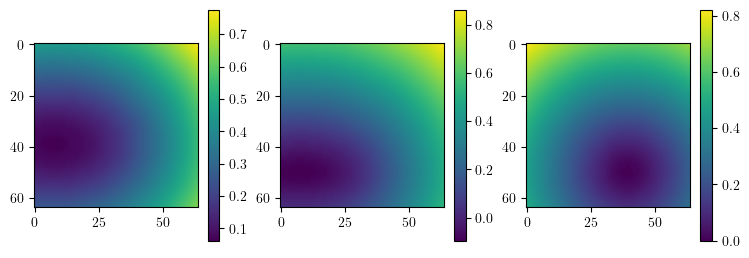

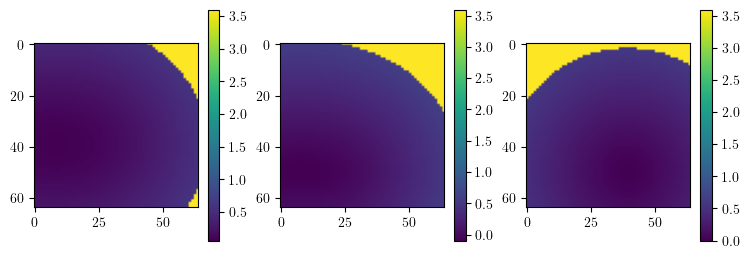

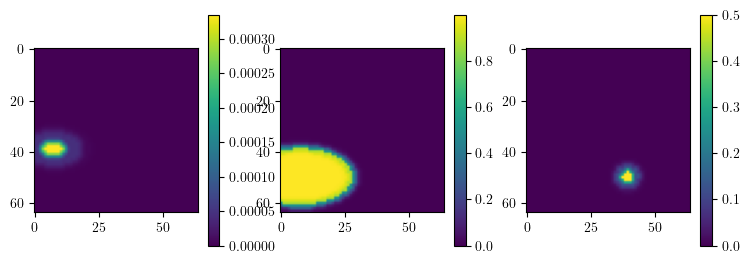

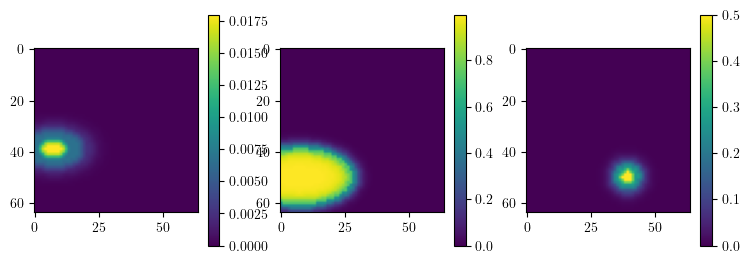

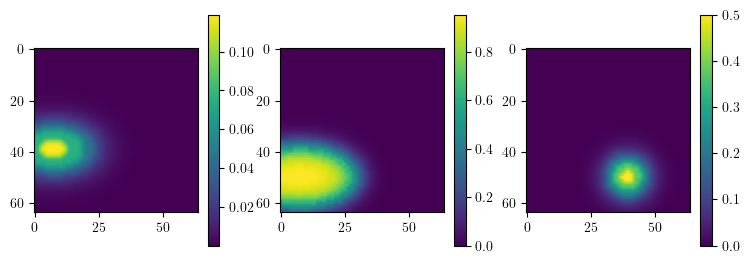

In [8]:
# Visualise first sample from each dataset

visualise_dataset_sample(dataset_exact_sdf[0])
visualise_dataset_sample(dataset_approximate_sdf[0])
visualise_dataset_sample(dataset_tanh_sharp[0])
visualise_dataset_sample(dataset_tanh[0])
visualise_dataset_sample(dataset_tanh_smooth[0])

In [11]:
def visualise_grad_magnitude(arr):
    dx = 1 / 64
    arr = arr.squeeze()
    grad = np.gradient(arr, dx)
    grad_magnitude = np.sqrt(np.sum(np.square(grad), axis=0))

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(grad_magnitude[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(grad_magnitude[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(grad_magnitude[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()

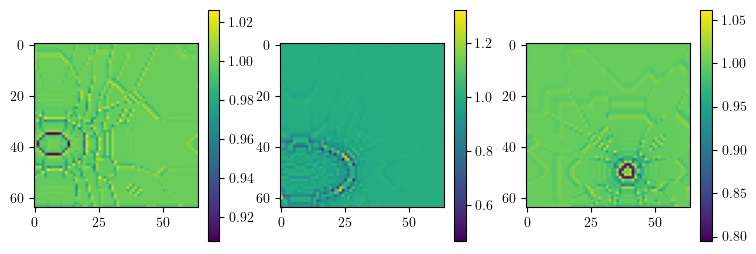

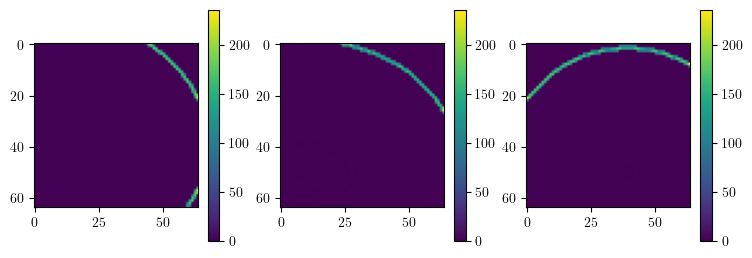

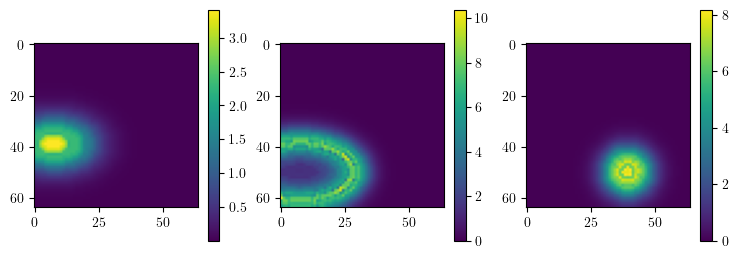

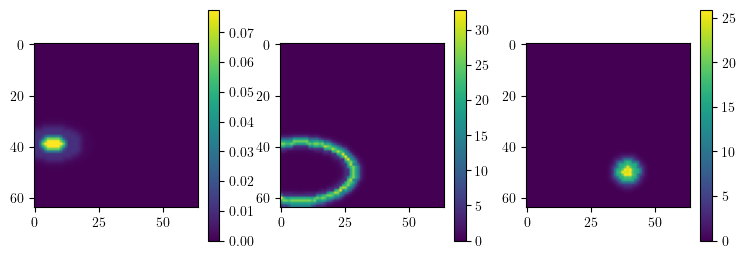

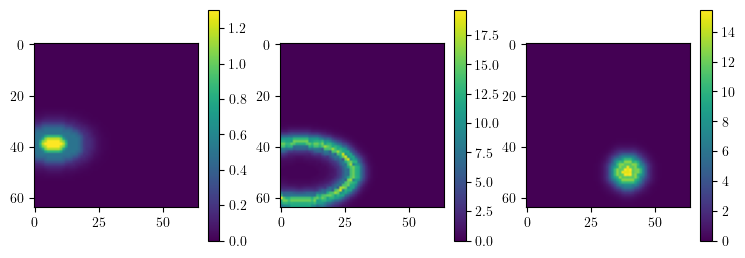

In [13]:
# Visualise gradient magnitude of first sample from each dataset

visualise_grad_magnitude(dataset_exact_sdf[0])
visualise_grad_magnitude(dataset_approximate_sdf[0])
visualise_grad_magnitude(dataset_tanh_smooth[0])
visualise_grad_magnitude(dataset_tanh_sharp[0])
visualise_grad_magnitude(dataset_tanh[0])
